In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
#Check data types of all attributes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [3]:
#Statistical summary of data
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
#Check for duplication
df.duplicated().sum()

0

In [ ]:
#Check for all observations of attributes

In [5]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [6]:
df['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [7]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [ ]:
#Visualization of the attributes and observations count

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

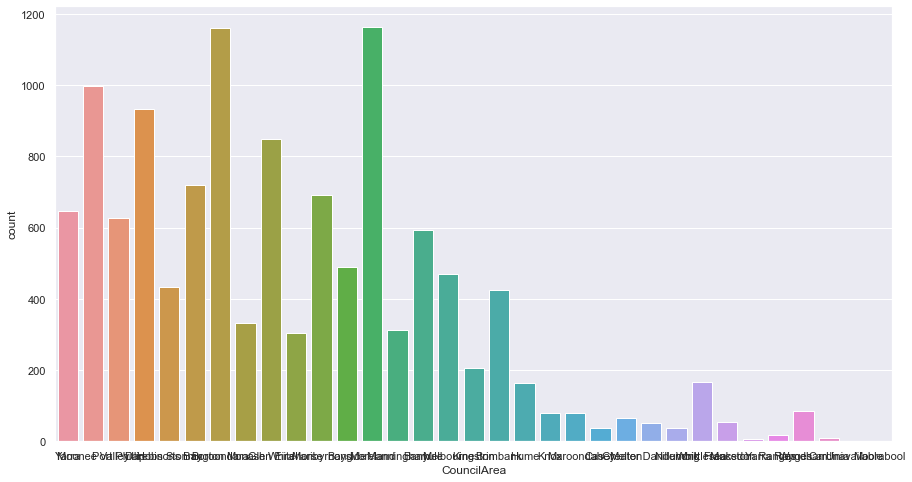

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(df['CouncilArea']).unique()

In [ ]:
#Check for null values

In [11]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [12]:
#Drop columns with high number of null values and irrelevant column
df = df.drop(['BuildingArea','YearBuilt','CouncilArea','Propertycount'],axis=1)

In [13]:
#Fill missing values with the values of next observations
df = df.fillna(method='bfill', axis=0).fillna(0)

In [14]:
df = df[df['Landsize'] != 0]
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

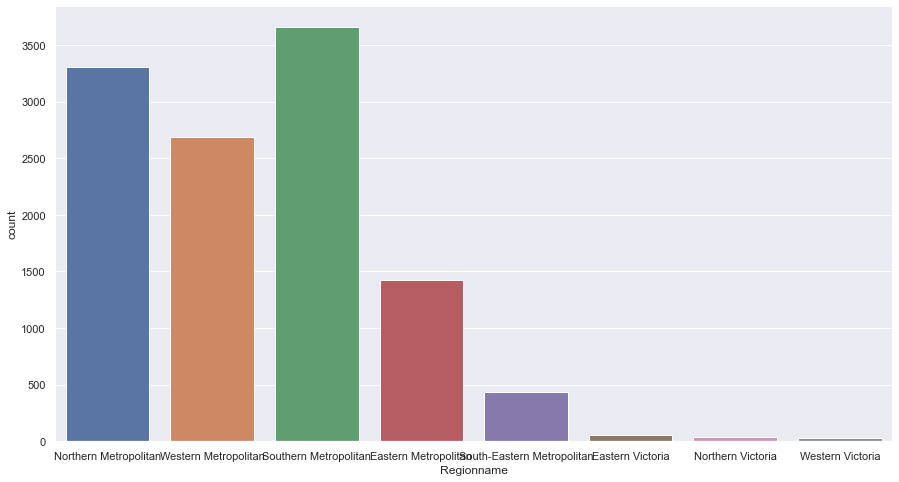

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(df['Regionname']).unique()

In [ ]:
#Check for outliers with boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x124a534c0>,
 'caps': [<matplotlib.lines.Line2D at 0x124a53b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x124a53070>,
 'medians': [<matplotlib.lines.Line2D at 0x124a62280>,
 'fliers': [<matplotlib.lines.Line2D at 0x124a62610>,
 'means': []}

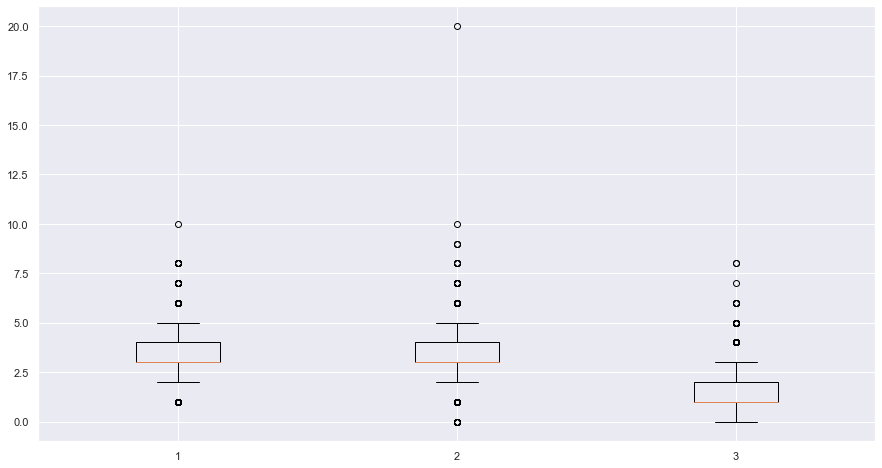

In [16]:
plt.boxplot([df['Rooms'],df['Bedroom2'],df['Bathroom']])

{'whiskers': [<matplotlib.lines.Line2D at 0x124a0f9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x124a02910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1258c8f40>],
 'medians': [<matplotlib.lines.Line2D at 0x124a02100>],
 'fliers': [<matplotlib.lines.Line2D at 0x124a02430>],
 'means': []}

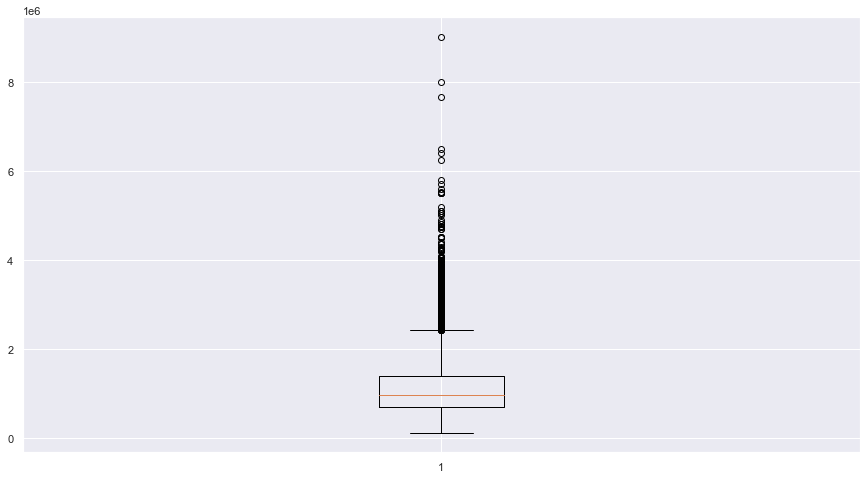

In [17]:
plt.boxplot(df['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x124f83c40>,
 'caps': [<matplotlib.lines.Line2D at 0x124f83a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1248b2790>],
 'medians': [<matplotlib.lines.Line2D at 0x124f5e850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1246d2340>],
 'means': []}

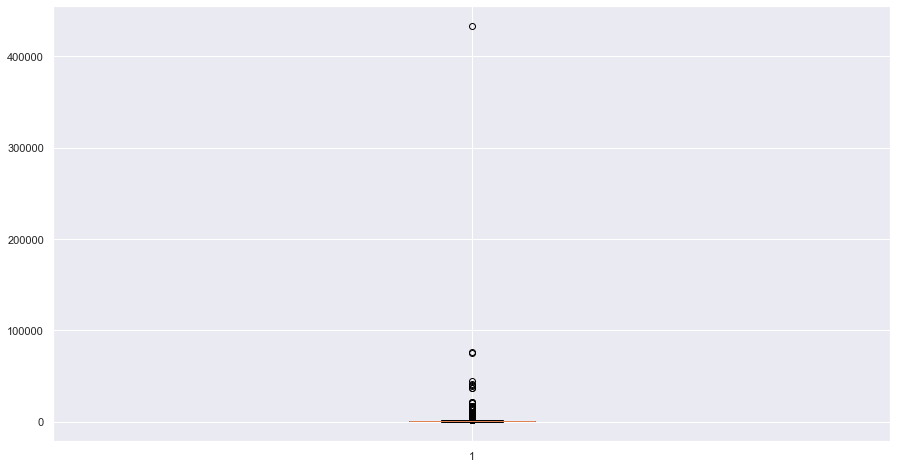

In [18]:
plt.boxplot(df['Landsize'])

In [19]:
del_landsize = df.index[df['Landsize'] > 9000].tolist()
del_landsize

[687,
 2084,
 2487,
 3750,
 3942,
 4706,
 5194,
 5584,
 5592,
 5694,
 7778,
 8241,
 8379,
 8828,
 9223,
 10045,
 10488,
 10504,
 10819,
 11020,
 11371,
 11526,
 12163,
 12340,
 12504,
 12594,
 12723,
 13245,
 13389]

In [20]:
df = df.drop(labels = [687,
 2084,
 2487,
 3750,
 3942,
 4706,
 5194,
 5584,
 5592,
 5694,
 7778,
 8241,
 8379,
 8828,
 9223,
 10045,
 10488,
 10504,
 10819,
 11020,
 11371,
 11526,
 12163,
 12340,
 12504,
 12594,
 12723,
 13245,
 13389], axis=0)
df.shape

(11612, 17)

In [21]:
df.index[df['Bedroom2'] > 10].tolist()

[7404]

In [22]:
df = df.drop(labels = [7404], axis=0)
df.shape

(11611, 17)

In [ ]:
#Check for distribution and skewness of data

In [23]:
df.skew(), df.kurt()

/var/folders/kv/q8v8kt9n5dg8h7tfdqqxl0v00000gn/T/ipykernel_81961/2428959278.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(), df.kurt()


(Rooms         0.473855
 Price         2.250637
 Distance      1.647669
 Postcode      4.230372
 Bedroom2      0.476862
 Bathroom      1.291885
 Car           1.257641
 Landsize      6.677041
 Lattitude    -0.501279
 Longtitude   -0.234495
 dtype: float64,
 Rooms          1.216133
 Price          9.988420
 Distance       4.993689
 Postcode      29.192181
 Bedroom2       1.561416
 Bathroom       3.216969
 Car            4.779153
 Landsize      67.104334
 Lattitude      1.397813
 Longtitude     1.344008
 dtype: float64)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:title={'center':'Log Normal'}, xlabel='Price'>

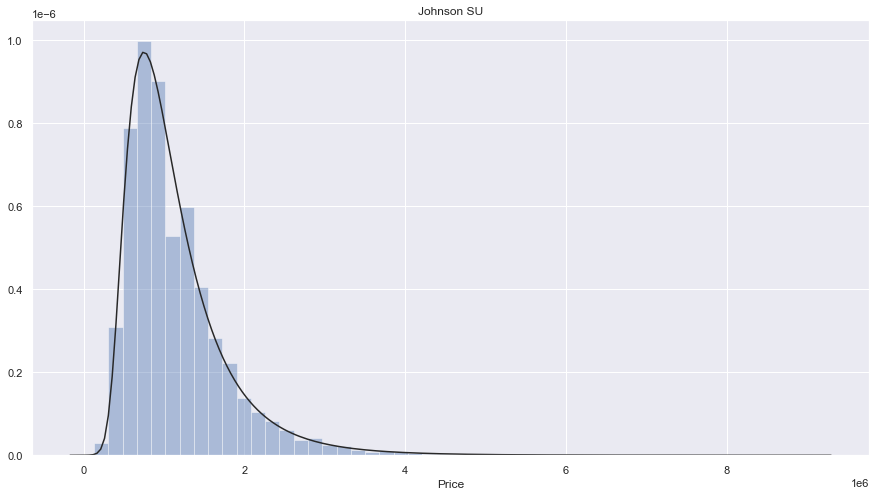

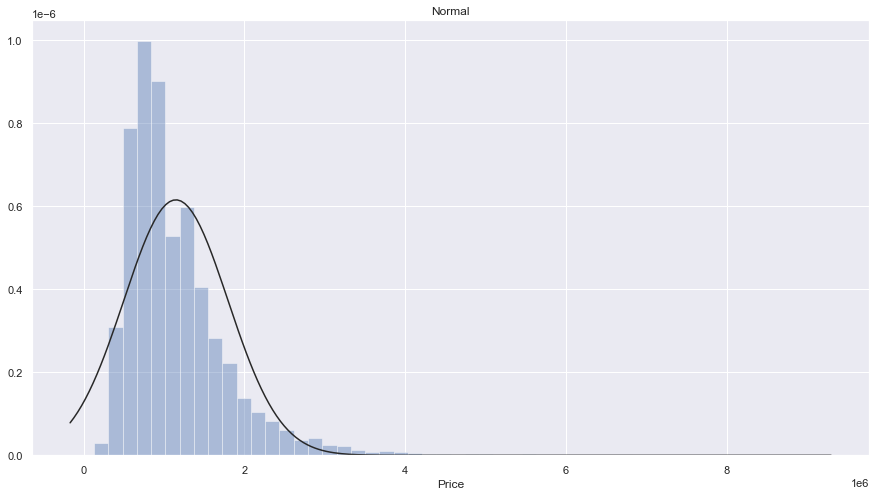

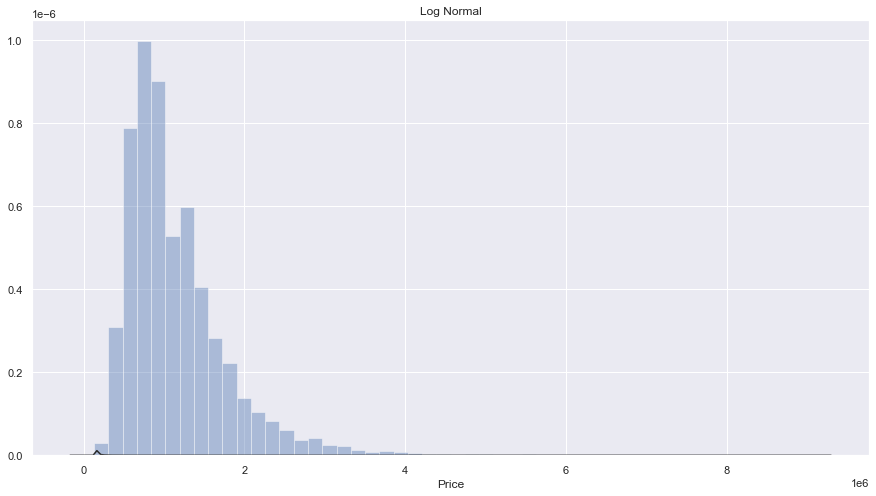

In [24]:
y = df['Price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

/var/folders/kv/q8v8kt9n5dg8h7tfdqqxl0v00000gn/T/ipykernel_81961/1290323436.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.skew(),color='blue',axlabel ='Skewness')
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

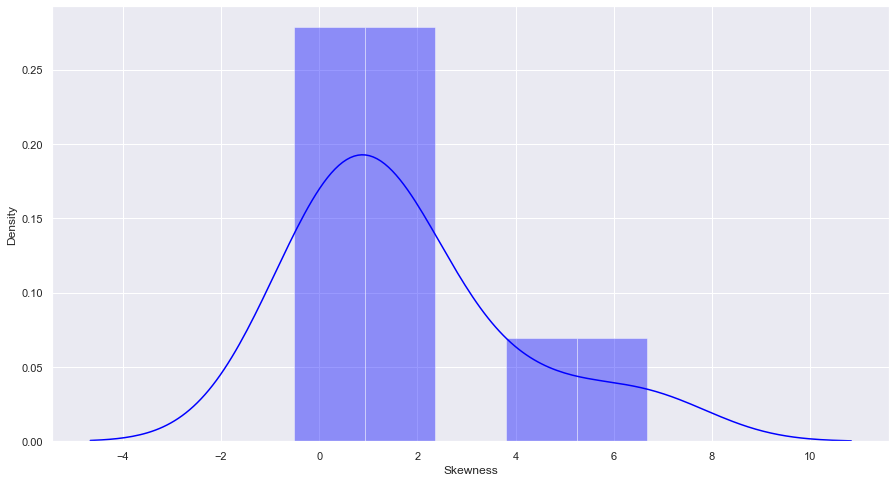

In [25]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

/var/folders/kv/q8v8kt9n5dg8h7tfdqqxl0v00000gn/T/ipykernel_81961/3046955554.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


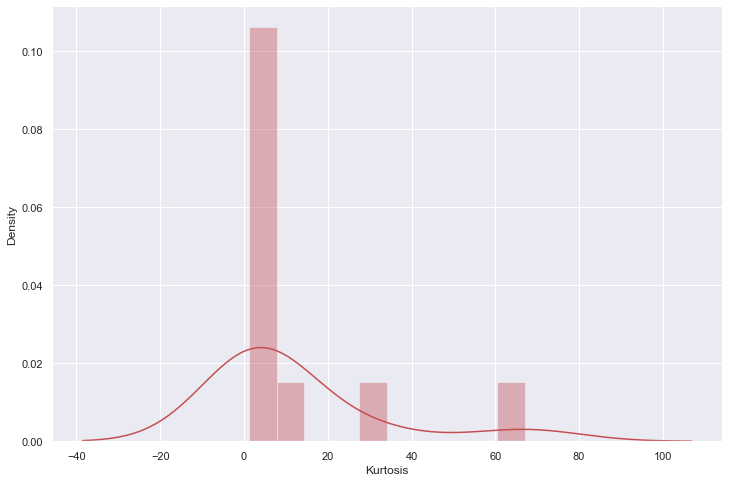

In [26]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

(array([   7.,   56.,  518., 2308., 3783., 3087., 1402.,  381.,   63.,
           6.]),
 array([11.7829526 , 12.20593086, 12.62890911, 13.05188736, 13.47486562,
        13.89784387, 14.32082212, 14.74380038, 15.16677863, 15.58975688,
        16.01273514]),
 <BarContainer object of 10 artists>)

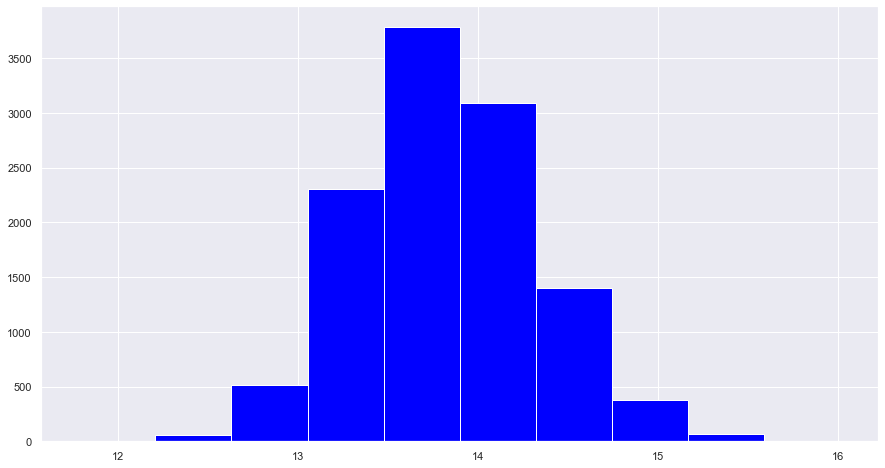

In [27]:
target = np.log(df['Price'])
target.skew()
plt.hist(target,color='blue')

In [ ]:
#Check for correlation between attributes

In [28]:
numeric_features = df.select_dtypes(include=[np.number])
correlation = numeric_features.corr()
print(correlation['Price'].sort_values(ascending = False),'\n')

Price         1.000000
Bathroom      0.435281
Rooms         0.425689
Bedroom2      0.407165
Longtitude    0.208546
Car           0.179526
Postcode      0.115482
Landsize      0.040349
Lattitude    -0.253301
Distance     -0.264896
Name: Price, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

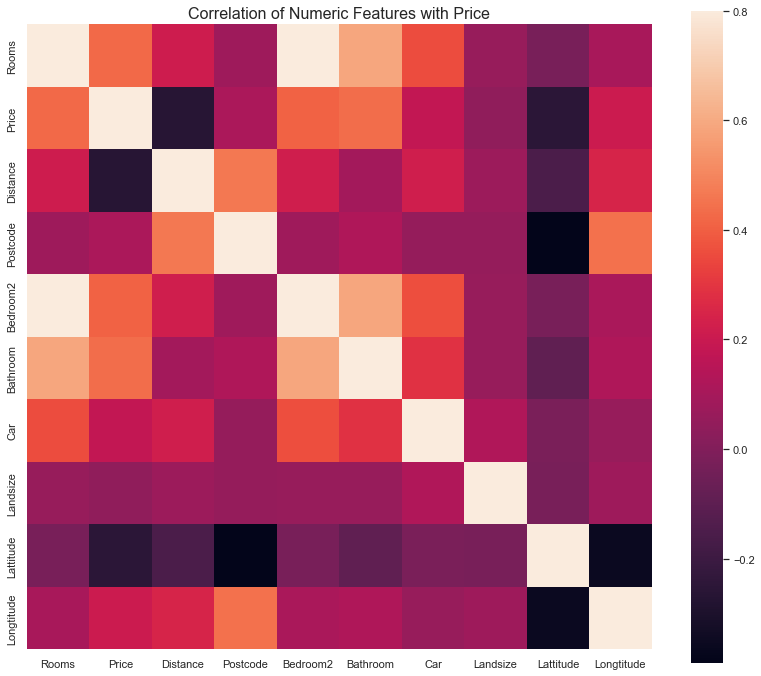

In [29]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

Index(['Price', 'Bathroom', 'Rooms', 'Bedroom2', 'Longtitude', 'Car',
       'Postcode', 'Landsize', 'Lattitude', 'Distance'],
      dtype='object')


<AxesSubplot:>

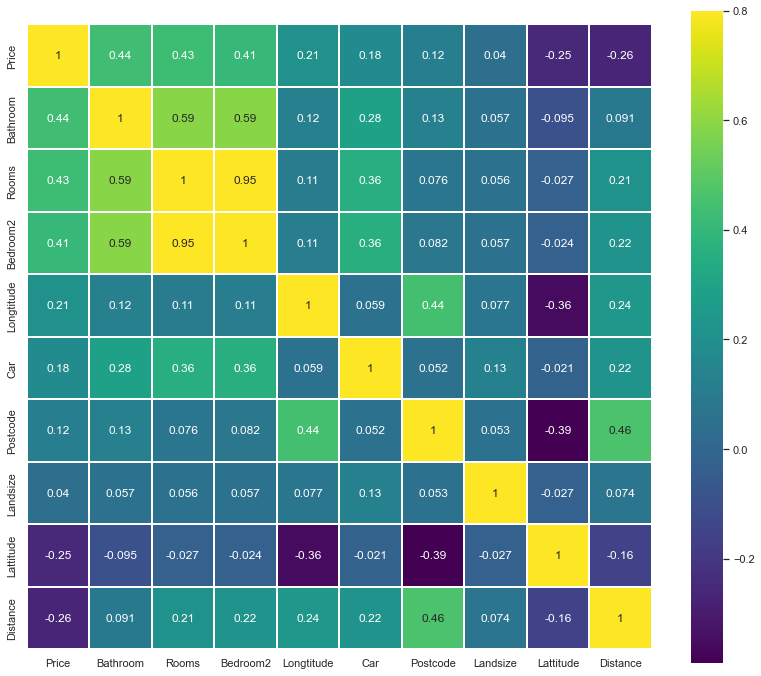

In [30]:
k= 11
cols = correlation.nlargest(k,'Price')['Price'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

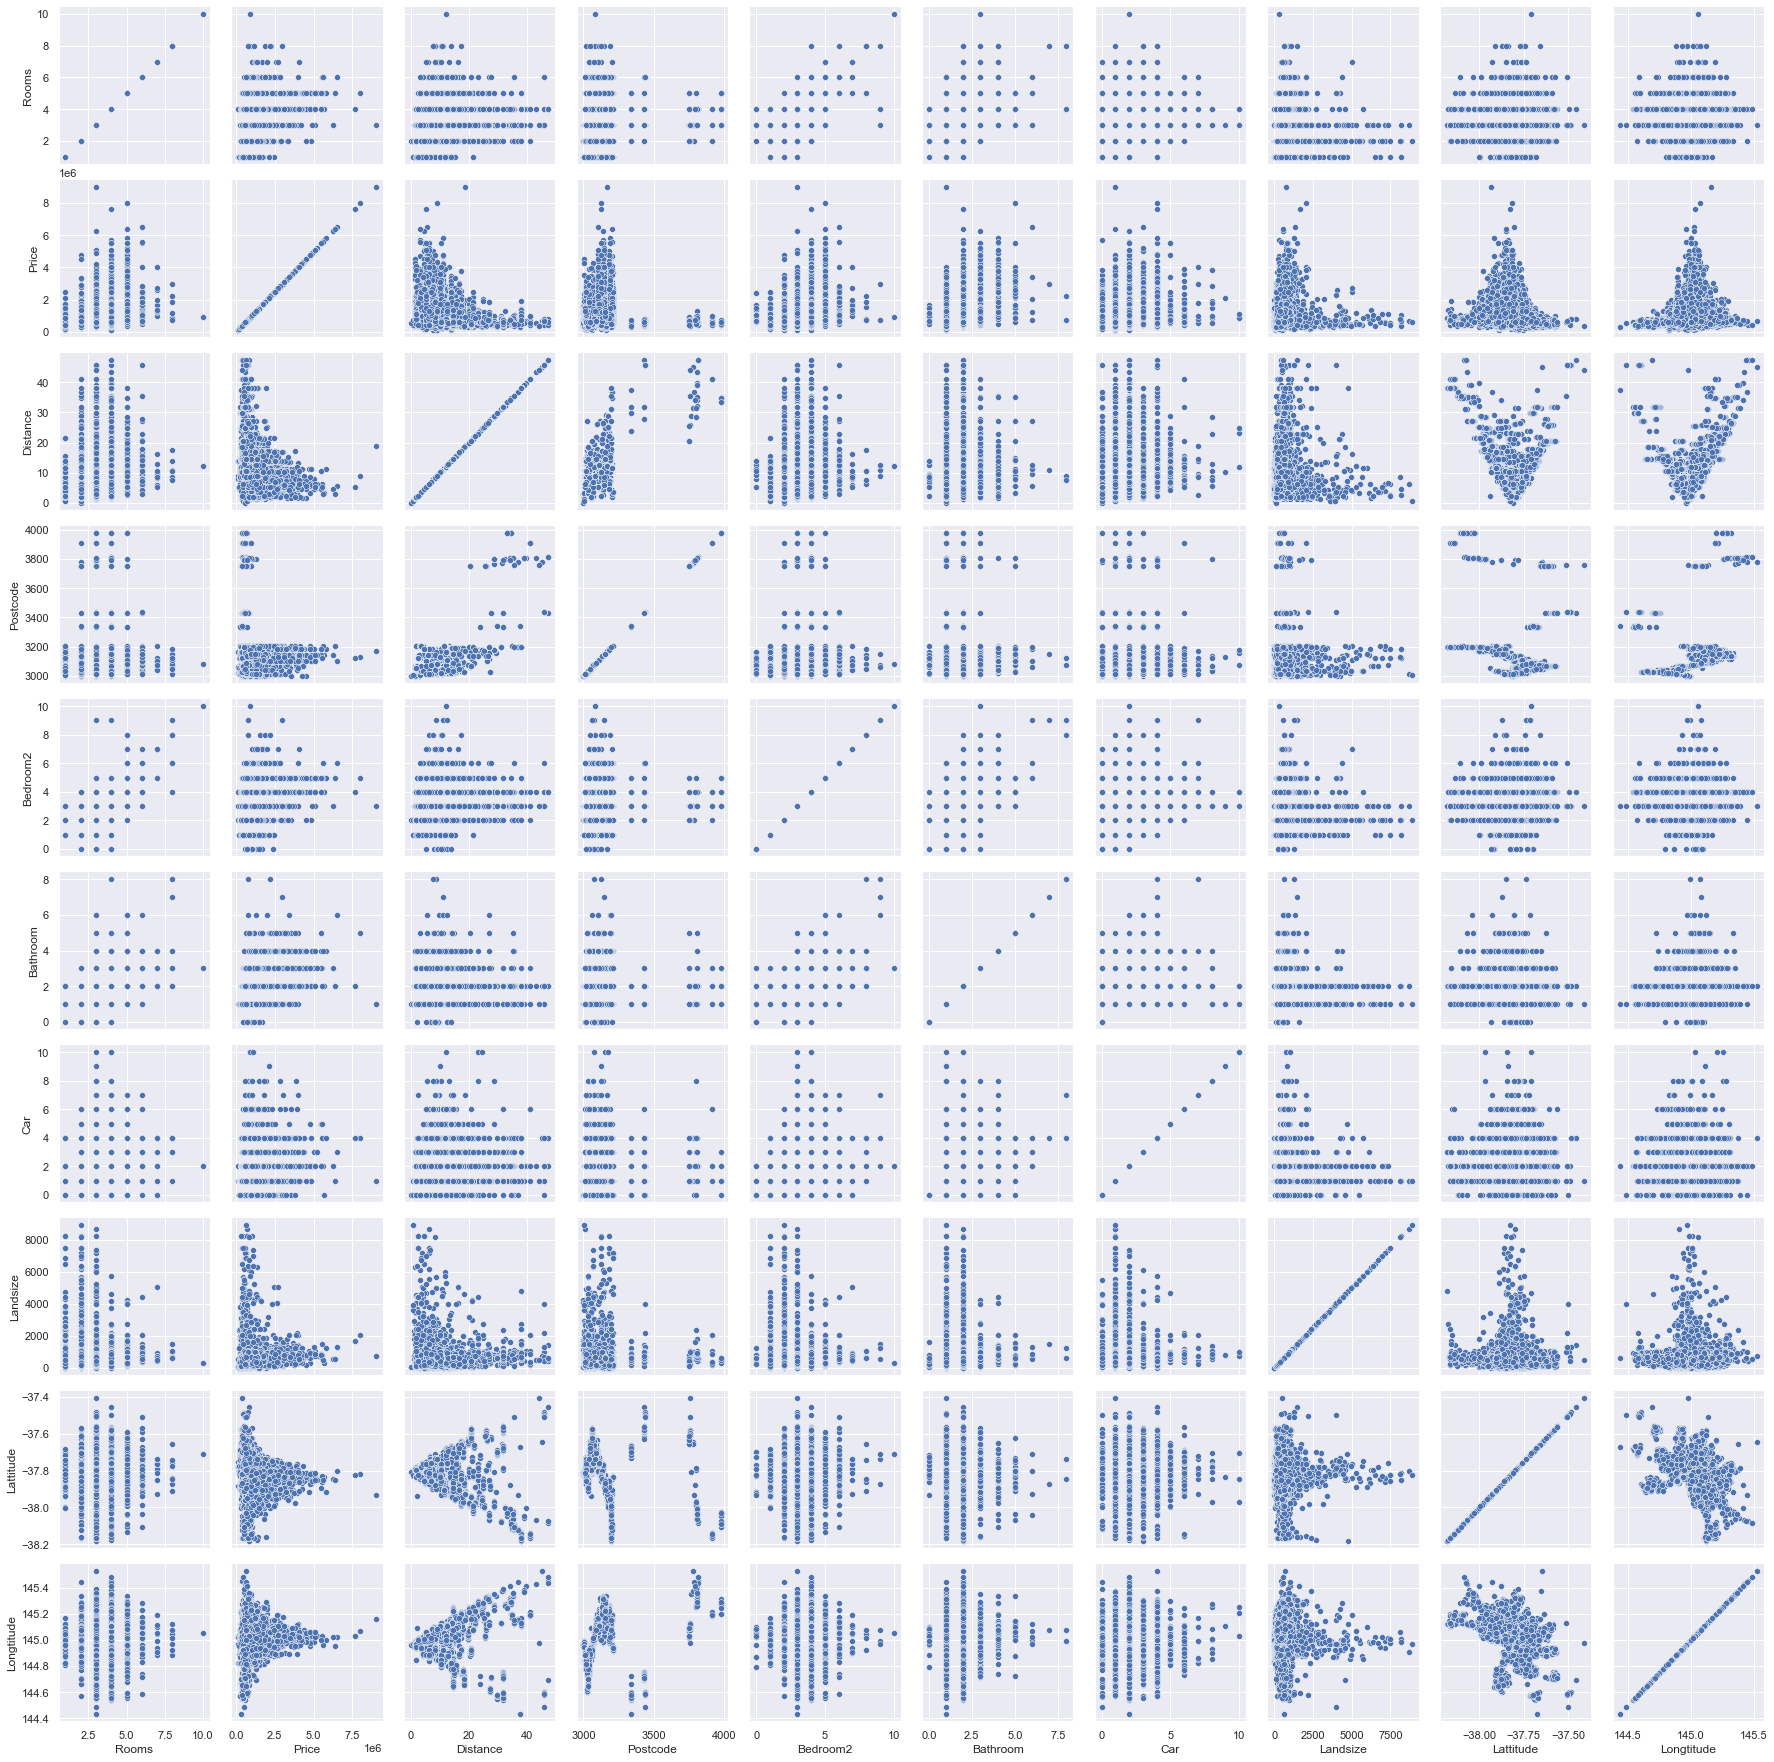

In [31]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [ ]:
#Encode categorical data

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

new_df = df[['Suburb','Type','Method','SellerG']].copy()
non_concat_df = df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize']].copy()

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ['Suburb','Type','Method','SellerG'])
result = encoder.fit_transform(df)
result.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname
0,1,85 Turner St,2,1,1480000.0,1,1,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan
1,1,25 Bloomburg St,2,1,1035000.0,1,1,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan
2,1,5 Charles St,3,1,1465000.0,2,1,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan
3,1,40 Federation La,3,1,850000.0,3,1,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,Northern Metropolitan
4,1,55a Park St,4,1,1600000.0,4,2,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,Northern Metropolitan


In [ ]:
#Conduct Cluster Analysis with k-means

In [51]:
data = df[['Rooms','Car','Landsize','Distance','Price']]

df = data.dropna()

In [52]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data_scaled= scaler.fit_transform(df)

data_s = pd.DataFrame(data_scaled).describe()
data_s

,0,1,2,3,4
count,1.161100e+04,1.161100e+04,1.161100e+04,1.161100e+04,1.161100e+04
mean,-1.836176e-15,-3.462307e-15,4.056603e-17,-5.703205e-15,-5.033868e-16
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-2.347834e+00,-1.705033e+00,-1.014865e+00,-1.821512e+00,-1.569379e+00
25%,-1.120675e-01,-6.970835e-01,-5.245944e-01,-6.536330e-01,-6.679990e-01
50%,-1.120675e-01,3.108663e-01,-4.347033e-02,-9.508231e-02,-2.690149e-01
75%,1.005815e+00,3.108663e-01,2.163001e-01,4.634683e-01,3.892703e-01
max,7.713114e+00,8.374465e+00,1.524274e+01,6.201307e+00,1.211956e+01


In [53]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [54]:
kmeans.inertia_

45790.71601480938

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anacond

Text(0, 0.5, 'Inertia')

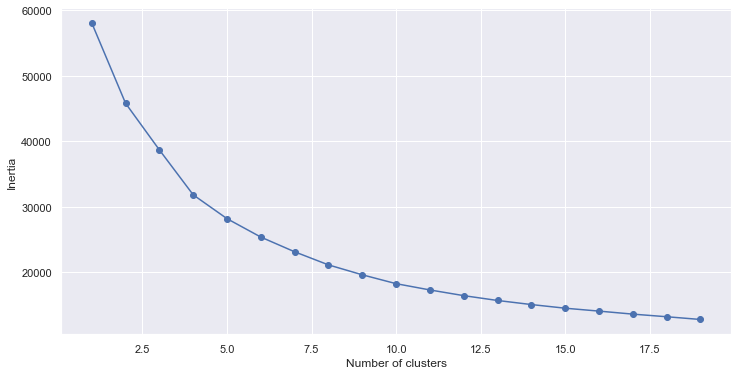

In [55]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = 'k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster': range(1,20), 'SSE':SSE})
plt.figure(figsize = (12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [56]:
clusters = [5,6,7,8,9]
pred = []

for cluster in clusters:
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = 'k-means++')
    kmeans.fit(data_scaled)
    pred.append(kmeans.predict(data_scaled))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anacond

In [57]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[0]

In [58]:
frame['cluster'].unique()

array([1, 0, 2, 4, 3], dtype=int32)

/var/folders/kv/q8v8kt9n5dg8h7tfdqqxl0v00000gn/T/ipykernel_81961/3812203514.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


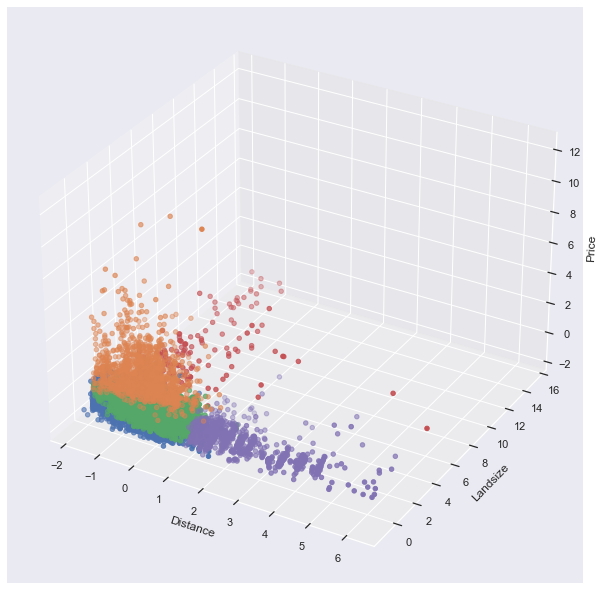

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
    ax.scatter(frame[frame.cluster==i][3], frame[frame.cluster==i][2], frame[frame.cluster==i][4])
    ax.set_xlabel('Distance')
    ax.set_ylabel('Landsize')
    ax.set_zlabel('Price')  

In [ ]:
#By cluster analysis, we can see the 5 different groups of properties based on distance, landsize and price.
#Houses in closer distance to city centre (blue, green, orange clusters) are more varried in prices as well as landsize. 
#Purple cluster shows houses in further distance that are less in price and landsize.